# 🧠 Introduction to Deep Learning with PyTorch

In this notebook, we’ll walk through the process of building a simple neural network from scratch using PyTorch.

### 📌 Concepts Covered:
- Tensors and DataLoader
- Neural Network layers and architecture
- Activation functions
- Loss functions
- Optimizers
- Training loop with batch size and epochs
- Regularization (L2)
- Evaluation and accuracy

We'll use the **Iris dataset** for simplicity.

In [1]:
# 📦 Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

## 📥 Load and Prepare the Data

In [2]:
# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

In [23]:
print(len(X), len(y))

150 150


In [5]:
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [8]:
y[0:4]

array([0, 0, 0, 0])

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
scaler

StandardScaler()

In [14]:
X_train[0:4]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282]])

In [15]:
X_test[0:4]

array([[ 0.35451684, -0.58505976,  0.55777524,  0.02224751],
       [-0.13307079,  1.65083742, -1.16139502, -1.17911778],
       [ 2.30486738, -1.0322392 ,  1.8185001 ,  1.49058286],
       [ 0.23261993, -0.36147005,  0.44316389,  0.4227026 ]])

In [16]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [18]:
X_train_tensor[0:4]

tensor([[-1.4739,  1.2037, -1.5625, -1.3126],
        [-0.1331,  2.9924, -1.2760, -1.0456],
        [ 1.0859,  0.0857,  0.3859,  0.2892],
        [-1.2301,  0.7565, -1.2187, -1.3126]])

In [19]:
# Create DataLoader
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [25]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [21]:
for batch_X, batch_y in train_loader:
    print(batch_X.shape)
    print(batch_y.shape)

torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([8, 4])
torch.Size([8])


## 🔧 Define the Neural Network

A simple neural network with 1 hidden layer and ReLU activation.

In [43]:
# Define a simple neural network by subclassing nn.Module
class SimpleNN(nn.Module):
    def __init__(self):
        # Call the parent constructor
        super(SimpleNN, self).__init__()

        # Define the first fully connected (dense) layer
        # Input features = 4 (e.g., if using the Iris dataset: sepal length, width, etc.)
        # Output features = 10 (this is the number of neurons in the hidden layer)
        self.fc1 = nn.Linear(4, 10)  

        # Apply ReLU (Rectified Linear Unit) activation to add non-linearity
        self.relu = nn.ReLU()

        # Define the second fully connected layer
        # Input = 10 (from previous layer), Output = 3 (number of classes to predict)
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        # Forward pass through the network

        # Step 1: Pass input through first linear layer
        # Example: if x has shape [batch_size=16, 4], output will be [16, 10]
        out = self.fc1(x)

        # Step 2: Apply ReLU activation to the output of fc1
        # ReLU zeroes out negative values, keeping only positive ones
        out = self.relu(out)

        # Step 3: Pass through the second linear layer
        # This will produce 3 values per sample, corresponding to class scores (logits)
        out = self.fc2(out)

        # Return the final output (raw scores for each class)
        return out

## 🔧 testing just one batch of data

In [26]:
for batch_X, batch_y in train_loader:
    X_batch = batch_X
    y_batch = batch_y
    break

In [35]:
X_batch

tensor([[ 1.3297,  0.3093,  1.1308,  1.4906],
        [ 1.9392, -0.5851,  1.3601,  0.9566],
        [ 0.5983, -1.2558,  0.6724,  0.4227],
        [ 0.5983, -0.5851,  0.7870,  0.4227],
        [-1.7177,  0.3093, -1.3906, -1.3126],
        [-0.9863, -2.3738, -0.1299, -0.2447],
        [ 0.1107,  0.3093,  0.6151,  0.8232],
        [-1.4739,  0.7565, -1.3333, -1.1791],
        [-0.7426, -0.8086,  0.0993,  0.2892],
        [-1.7177, -0.1379, -1.3906, -1.3126],
        [ 0.5983,  0.7565,  1.0735,  1.6241],
        [ 0.7202,  0.3093,  0.4432,  0.4227],
        [ 0.3545, -0.5851,  0.1566,  0.1557],
        [ 0.1107, -0.1379,  0.2712,  0.4227],
        [ 1.0859,  0.5329,  1.1308,  1.7576],
        [-1.1082, -1.4794, -0.2445, -0.2447]])

In [28]:
len(X_batch)

16

In [29]:
len(y_batch)

16

In [30]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

In [38]:
type(model)

__main__.SimpleNN

In [39]:
print(model)

SimpleNN(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)


In [32]:
optimizer.zero_grad()
outputs = model(batch_X)

In [33]:
outputs

tensor([[-0.4261, -0.0335,  0.1548],
        [-0.4374,  0.0952,  0.2108],
        [-0.3369,  0.1112,  0.1970],
        [-0.3158,  0.0932,  0.1963],
        [-0.4496,  0.0587,  0.2416],
        [-0.2936,  0.2107,  0.1348],
        [-0.3941, -0.0474,  0.1387],
        [-0.4506,  0.0627,  0.3028],
        [-0.3663,  0.0399,  0.0990],
        [-0.4251,  0.0586,  0.1960],
        [-0.4563, -0.1331,  0.0901],
        [-0.3046,  0.0762,  0.2671],
        [-0.2815,  0.1120,  0.2533],
        [-0.3386,  0.0337,  0.2014],
        [-0.4387, -0.0993,  0.1198],
        [-0.3150,  0.1789,  0.0954]], grad_fn=<AddmmBackward0>)

In [34]:
len(outputs)

16

In [36]:
y_batch

tensor([2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1])

In [37]:
len(y_batch)

16

In [40]:
loss = criterion(outputs, batch_y)

In [41]:
loss

tensor(1.0685, grad_fn=<NllLossBackward0>)

## 🏋️‍♀️ Train the Model

In [44]:
# Instantiate (create) the neural network model from the class we defined earlier
model = SimpleNN()

# Define the loss function
# CrossEntropyLoss is used for multi-class classification problems
# It compares the predicted class scores (logits) with the true labels
criterion = nn.CrossEntropyLoss()

# Define the optimizer
# Adam is a commonly used optimizer that adapts the learning rate for each parameter
# lr = learning rate (how big a step we take during each update)
# weight_decay = L2 regularization (penalizes large weights to prevent overfitting)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

# Set the number of training epochs
# One epoch means the model has seen the entire dataset once
epochs = 100

# Store the loss for each epoch so we can plot or analyze it later
losses = []

# Start training the model
for epoch in range(epochs):
    epoch_loss = 0.0  # Reset epoch loss to 0 at the beginning of each epoch

    # Loop over batches from the DataLoader
    # Each batch contains a subset of training data (batch_X: input, batch_y: target labels)
    for batch_X, batch_y in train_loader:

        # Step 1: Clear old gradients from the previous step (otherwise they'll accumulate)
        optimizer.zero_grad()

        # Step 2: Perform a forward pass to get predictions from the model
        outputs = model(batch_X)  # Shape: [batch_size, num_classes]

        # Step 3: Calculate the loss between the predictions and true labels
        loss = criterion(outputs, batch_y)

        # Step 4: Backpropagate the loss (compute gradients)
        loss.backward()

        # Step 5: Update model parameters using the computed gradients
        optimizer.step()

        # Add the current batch's loss to the total epoch loss
        epoch_loss += loss.item()

    # Store the average loss for the epoch
    losses.append(epoch_loss / len(train_loader))

    # Print progress every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

Epoch [10/100], Loss: 2.5225
Epoch [20/100], Loss: 1.1109
Epoch [30/100], Loss: 0.8004
Epoch [40/100], Loss: 0.7235
Epoch [50/100], Loss: 0.6972
Epoch [60/100], Loss: 0.7430
Epoch [70/100], Loss: 0.7252
Epoch [80/100], Loss: 0.6773
Epoch [90/100], Loss: 0.7573
Epoch [100/100], Loss: 0.6801


## 📈 Visualize Training Loss

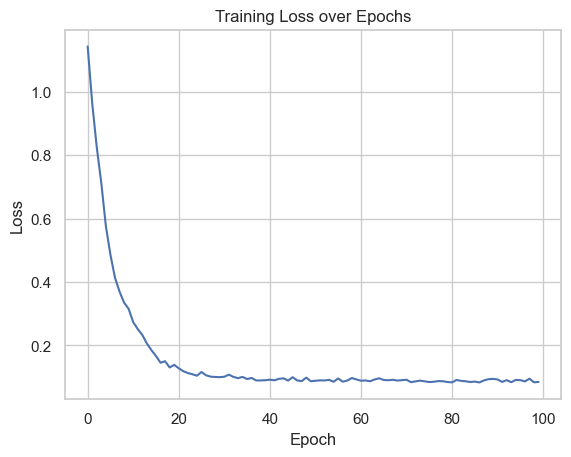

In [45]:
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## ✅ Evaluate the Model on Test Data

In [46]:
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = torch.argmax(outputs, dim=1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy.item()*100:.2f}%")

Test Accuracy: 100.00%


## 📌 Summary
- We used PyTorch to define, train, and evaluate a basic feed-forward neural network.
- Covered key deep learning concepts like batch size, epochs, optimizers, loss functions, and L2 regularization.
- This forms the foundation for building more complex models like CNNs or RNNs.

🔁 Try modifying the number of layers, units, or adding dropout to improve performance!